In [20]:
import pandas as pd
import sys
import matplotlib
import matplotlib.pyplot as plt
import os
import numpy as np

In [92]:
data = pd.read_csv('ML_Patents_Database.csv')

In [93]:
print("Total number of columns: " + str(len(data.columns)))
print(data.columns)

Total number of columns: 63
Index(['ABANDON_DATE', 'ABN_YEAR', 'APPDATE', 'APPMONTH', 'APPNUM', 'APPTYPE',
       'APPYEAR', 'ASGCITY', 'ASGCOUNTRY', 'ASGNUM', 'ASGSEQ', 'ASGSTATE',
       'ASSIGNEE', 'AYM', 'CATEGORY', 'CLAIMS', 'CLASS', 'DISPOSAL_TYPE',
       'ELAG_FLAG', 'EXAMINER_ART_UNIT', 'EXAMINER_ID', 'FILING_DATE',
       'FILING_YEAR', 'FIRSTNAME', 'GDATE', 'GMONTH', 'GYEAR', 'GYM',
       'INVCITY', 'INVCOUNTRY', 'INVNUM', 'INVSEQ', 'INVSTATE', 'KIND',
       'LASTNAME', 'NBCITE', 'NFCITE', 'NUMAPP', 'NUMPAT', 'PATENT', 'PERDCAT',
       'PRIM', 'RESIDENCE', 'SUBCLASS', 'ABN', 'DES', 'UTL', 'US', 'CAT',
       'PRIMINV', 'TEAM', 'NUMPRIM', 'LONE', 'NUMLONE', 'NUMCOINV', 'TOTAPP',
       'USINV', 'LNUMAPP', 'LNBCITE', 'LNFCITE', 'LCLAIMS', 'INVCOUNT',
       'TEAMSIZE'],
      dtype='object')


In [94]:
data = data.drop(['ABANDON_DATE', 'ABN_YEAR', 'APPMONTH',
       'APPNUM', 'APPTYPE', 'APPYEAR', 'ASGCITY', 'ASGCOUNTRY',
       'ASGSEQ', 'ASGSTATE',
       'DISPOSAL_TYPE', 'EXAMINER_ART_UNIT', 'EXAMINER_ID', 'FILING_DATE','NFCITE',
       'FILING_YEAR', 'INVCITY', 'INVSTATE', 'KIND', 'PATENT', 'RESIDENCE', 'ABN', 'DES', 'UTL', 'US',
       'CAT', 'LONE', 'USINV', 'INVCOUNT', 'SUBCLASS'], 1)
data = data.drop(['AYM', 'ELAG_FLAG', 'GMONTH', 'GYEAR', 'GYM', 'PERDCAT', 'LNUMAPP', 'LNBCITE', 'LNFCITE', 'LCLAIMS', 'PRIM'], 1)

In [95]:
data = data.dropna(subset=['APPDATE', 'ASGNUM', 'ASSIGNEE', 'CLAIMS', 'CLASS',
       'FIRSTNAME', 'GDATE', 'INVCOUNTRY', 'INVNUM', 'INVSEQ', 'LASTNAME',
       'NBCITE' , 'NUMAPP', 'NUMPAT',
       'TEAM', 'NUMPRIM', 'NUMLONE', 'NUMCOINV', 'TOTAPP', 'TEAMSIZE'])

In [96]:
data['APPDATE'] = pd.to_datetime(data['APPDATE'])
data['GDATE'] = pd.to_datetime(data['GDATE'])
Y = np.array((data['GDATE'] - data['APPDATE']).astype('timedelta64[D]'))

In [97]:
# convert APPDATE and GDATE into int
data['APPDATE'] = data['APPDATE'].values.astype(int)
data['GDATE'] = data['GDATE'].values.astype(int)

data = data.drop(columns = ['APPDATE', 'INVNUM', 'GDATE'])

# normalization
numeric_data = data.dtypes[data.dtypes != 'object'].index
# for column in numeric_data:
#     data[column] = data[column].apply(
#         lambda x: (x - x.mean()) / x.st0d())

data[numeric_data] = data[numeric_data].apply(
    # lambda x: (x - x.mean()) / x.std())
    lambda x: (x - x.min()) / (x.max() - x.min()))
data[numeric_data] = data[numeric_data].fillna(0)

In [98]:
# Empty entries of CATEGORY are assigned "Others"
data.loc[data.CATEGORY.isnull(), 'CATEGORY'] = 'Others'
data.loc[data.CATEGORY == '', 'CATEGORY'] = 'Others'

# Empty entries of PRIMINV are assigned 1
data.loc[data.PRIMINV.isnull(), 'PRIMINV'] = '0'
data.loc[data.PRIMINV == '', 'PRIMINV'] = '0'

# Transforming PRIMINV to 0s and 1s
data.loc[data.PRIMINV == '0-Co-Inventor', 'PRIMINV'] = '0'
data.loc[data.PRIMINV != '0', 'PRIMINV'] = '1'
data['PRIMINV'] = pd.to_numeric(data['PRIMINV'])

# Transforming TEAM to 0s and 1s
data.loc[data.TEAM == '0-Lone Inventor', 'TEAM'] = '0'
data.loc[data.TEAM != '0', 'TEAM'] = '1'
data['TEAM'] = pd.to_numeric(data['TEAM'])

In [99]:
# Convert categorical features into numbers 
# 1. One-hot encoding
categories =['CATEGORY', 'INVCOUNTRY', 'CLASS']
def convert_onehot(data, feature):
    one_hot = pd.get_dummies(data[feature], prefix=feature)
    # concat to the data frame
    data = pd.concat([data, one_hot], axis=1)
    return data

for c in categories:
    print('Convert to one hot: Category ', c)
    data = convert_onehot(data, c)
    data = data.drop([c], 1)

Convert to one hot: Category  CATEGORY
Convert to one hot: Category  INVCOUNTRY
Convert to one hot: Category  CLASS


In [100]:
data = data.drop(columns=['FIRSTNAME', 'LASTNAME', 'ASSIGNEE'])

In [101]:
col_names = np.array(data.columns)
for col in col_names:
    data[col] = pd.to_numeric(data[col], errors='coerce')
X = np.array(data)

def convert_Y(y):
    if y < 182:
        return 0
    elif y < 365:
        return 1
    elif y < 547:
        return 2
    elif y < 730:
        return 3
    elif y < 912:
        return 4
    elif y < 1095:
        return 5
    else:
        return 6

In [102]:
converter = np.vectorize(convert_Y)
Y_conv = converter(Y)

# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# ohe.fit(np.array(range(7)).reshape((-1, 1)))

# Y_conv = ohe.transform(Y_conv.reshape((-1, 1))).toarray()

In [294]:
print("Shape of X: " + str(np.shape(X)))
print("Shape of Y: " + str(np.shape(Y)))
print("Shape of Y_conv: " + str(np.shape(Y_conv)))

print("Whether there exists NAN in X: " + str(np.isnan(X).any()))

print("Saving to X.npy, Y.npy, and col_names.npy...")
np.save("X.npy", X)
np.save("col_names.npy", col_names)
np.save("Y.npy", Y)
np.save("Y_conv.npy", Y_conv)

print("Done! Use np.load(\"X.npy\") to load training data")

Shape of X: (1384648, 559)
Shape of Y: (1384648,)
Shape of Y_conv: (1384648,)
Whether there exists NAN in X: False
Saving to X.npy, Y.npy, and col_names.npy...
Done! Use np.load("X.npy") to load training data


In [497]:
index=np.random.random_integers(0, 1384648, 10000)
X1=X[index,:]
Y1=Y[index]
Yc1=Y_conv[index]

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1384648 + 1) instead
  """Entry point for launching an IPython kernel.


In [498]:
# X01=X1
# from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
# pca.fit(X01)
# X02=pca.fit_transform(X01)

In [499]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1, Yc1)
Xnew = lda.transform(X1)
[a,b]=Xnew.shape
Xnew.reshape(b,a)

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([[ 0.85508317, -0.11045044, -0.49388837, ..., -0.13067235,
        -0.90514913,  0.18618758],
       [-0.04391279, -0.31637011,  0.33362558, ...,  0.6921452 ,
         0.87850612, -0.72030023],
       [ 2.33121116, -0.84798421, -1.48384287, ..., -0.05120388,
         0.23579245, -0.23198523],
       [ 0.31945759, -0.39990512, -0.76841034, ..., -0.67133972,
         0.69807424, -0.74199981],
       [-0.71905811,  0.31944025,  1.33755472, ...,  0.32315378,
         1.15937778,  0.234851  ],
       [-0.13656374, -0.22794347, -0.6432193 , ...,  0.1051028 ,
        -1.10446749,  0.37225137]])

In [500]:
Xnew1=Xnew[np.where(np.abs(Xnew[:,0])<20)]
Ycn=Yc1[np.where(np.abs(Xnew[:,0])<20)]
Y1n=Y1[np.where(np.abs(Xnew[:,0])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,1])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,1])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,1])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,2])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,2])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,2])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,3])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,3])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,3])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,4])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,4])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,4])<20)]
Xnew1.shape

(10000, 6)

In [501]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca.fit(Xnew1)
# components=pca.fit_transform(Xnew1)

In [502]:
# Xnew2=components

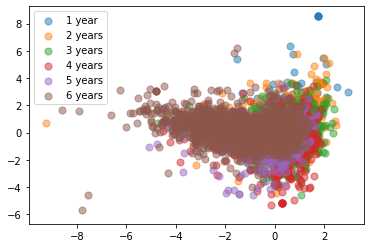

In [503]:
'''
LDA for 10000 samples
'''
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
for i in range(6):
    #ax.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)], z_lda[np.where(Ycn==i+1)], s=50,  alpha=0.5)
    plt.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)] , s=50,  alpha=0.5)
plt.legend(['1 year','2 years','3 years','4 years','5 years','6 years'])
plt.show()

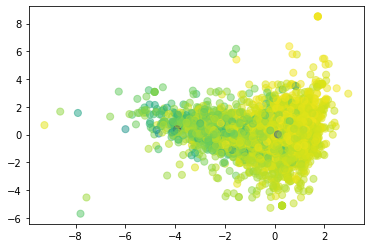

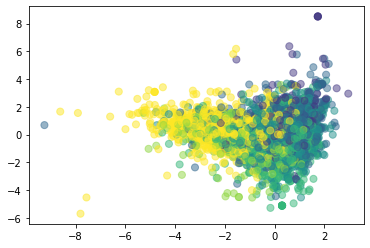

In [504]:
'''
LDA for 10000 samples
Figure Above: color goes darker as the granted days goes longer.
Figure Below: color goes lighter as the granted years (1/2/3/4/5/6 years) goes longer.
'''
Y2n=Y1n-np.mean(Y1n)
Y2n=Y2n/np.max(Y2n)

x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
plt.scatter(x_lda, y_lda, c=1-Y2n, s=50,  alpha=0.5)
plt.show()
plt.scatter(x_lda, y_lda, c=Ycn ,s=50,  alpha=0.5)

In [505]:
index=np.random.random_integers(0, 1384648, 1000)
X1=X[index,:]
Y1=Y[index]
Yc1=Y_conv[index]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1, Yc1)
Xnew = lda.transform(X1)
[a,b]=Xnew.shape
Xnew.reshape(b,a)

Xnew1=Xnew[np.where(np.abs(Xnew[:,0])<20)]
Ycn=Yc1[np.where(np.abs(Xnew[:,0])<20)]
Y1n=Y1[np.where(np.abs(Xnew[:,0])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,1])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,1])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,1])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,2])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,2])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,2])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,3])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,3])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,3])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,4])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,4])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,4])<20)]
Xnew1.shape

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1384648 + 1) instead
  """Entry point for launching an IPython kernel.
/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(1000, 6)

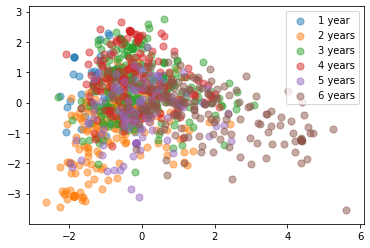

In [453]:
'''
LDA for 1000 samples
'''
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
for i in range(6):
    #ax.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)], z_lda[np.where(Ycn==i+1)], s=50,  alpha=0.5)
    plt.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)] ,s=50,  alpha=0.5)
plt.legend(['1 year','2 years','3 years','4 years','5 years','6 years'])
plt.show()

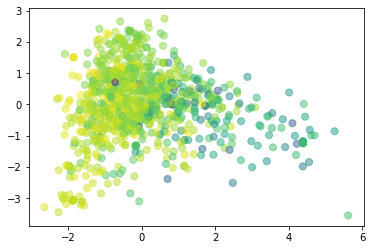

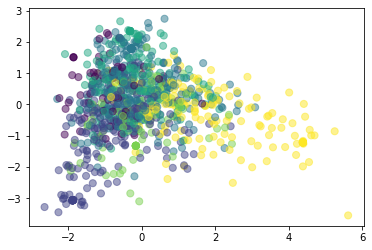

In [454]:
'''
LDA for 1000 samples
Figure Above: color goes darker as the granted days goes longer.
Figure Below: color goes lighter as the granted years (1/2/3/4/5/6 years) goes longer.
'''
Y2n=Y1n-np.mean(Y1n)
Y2n=Y2n/np.max(Y2n)

x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
plt.scatter(x_lda, y_lda, c=1-Y2n, s=50,  alpha=0.5)
plt.show()
plt.scatter(x_lda, y_lda, c=Ycn ,s=50,  alpha=0.5)

In [463]:
index=np.random.random_integers(0, 1384648, 100)
X1=X[index,:]
Y1=Y[index]
Yc1=Y_conv[index]

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X1, Yc1)
Xnew = lda.transform(X1)
[a,b]=Xnew.shape
Xnew.reshape(b,a)

Xnew1=Xnew[np.where(np.abs(Xnew[:,0])<20)]
Ycn=Yc1[np.where(np.abs(Xnew[:,0])<20)]
Y1n=Y1[np.where(np.abs(Xnew[:,0])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,1])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,1])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,1])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,2])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,2])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,2])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,3])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,3])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,3])<20)]
Xnew1=Xnew1[np.where(np.abs(Xnew1[:,4])<20)]
Ycn=Ycn[np.where(np.abs(Xnew1[:,4])<20)]
Y1n=Y1[np.where(np.abs(Xnew1[:,4])<20)]
Xnew1.shape

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1384648 + 1) instead
  """Entry point for launching an IPython kernel.
/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(96, 5)

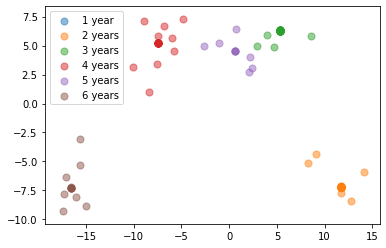

In [464]:
'''
LDA for 100 samples
'''
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
for i in range(6):
    #ax.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)], z_lda[np.where(Ycn==i+1)], s=50,  alpha=0.5)
    plt.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)] ,s=50,  alpha=0.5)
plt.legend(['1 year','2 years','3 years','4 years','5 years','6 years'])
plt.show()

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1384648 + 1) instead
  """Entry point for launching an IPython kernel.


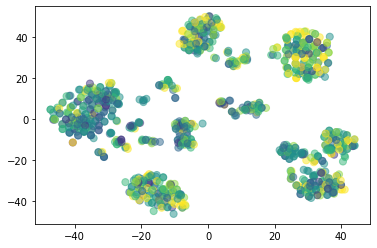

In [490]:
'''
TSNE for 1000 samples
'''
index=np.random.random_integers(0, 1384648, 1000)
X1=X[index,:]
Y1=Y[index]
Yc1=Y_conv[index]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X1)
tsne_df = pd.DataFrame({'X1':tsne_obj[:,0], 'X2':tsne_obj[:,1], 'y':Yc1})

# plt.scatter(tsne_df.X1, tsne_df.X2, c=tsne_df.y, s=40)
# plt.gray()

# plt.legend()
# plt.show()

plt.scatter(tsne_df.X1, tsne_df.X2, s=50, c=tsne_df.y, alpha=0.5)
# for i in range(6):
#     #ax.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)], z_lda[np.where(Ycn==i+1)], s=50,  alpha=0.5)
#     #plt.scatter(tsne_df.X1[np.where(Yc1==i+1)], tsne_df.X2[np.where(Yc1==i+1)], s=40)
#     plt.scatter(tsne_df.X1[np.where(Yc1==i+1)], tsne_df.X2[np.where(Yc1==i+1)] ,s=50,  alpha=0.5)
# plt.legend(['1 year','2 years','3 years','4 years','5 years','6 years'])
plt.show()

In [491]:
index=np.random.random_integers(0, 1384648, 1000)
X1=X[index,:]
Y1=Y[index]
Yc1=Y_conv[index]


from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(X1)
Xnew=pca.fit_transform(X1)

Xnew1=Xnew[np.where(np.abs(Xnew[:,0])<20)]
Ycn=Yc1[np.where(np.abs(Xnew[:,0])<20)]
Y1n=Y1[np.where(np.abs(Xnew[:,0])<20)]
Xnew1.shape

/Users/shirley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(0, 1384648 + 1) instead
  """Entry point for launching an IPython kernel.


(1000, 10)

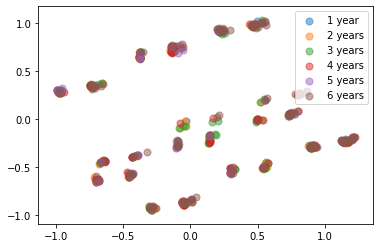

In [488]:
'''
PCA for 10000 samples
'''
from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
for i in range(6):
    #ax.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)], z_lda[np.where(Ycn==i+1)], s=50,  alpha=0.5)
    plt.scatter(x_lda[np.where(Ycn==i+1)], y_lda[np.where(Ycn==i+1)] ,s=50,  alpha=0.5)
plt.legend(['1 year','2 years','3 years','4 years','5 years','6 years'])
plt.show()

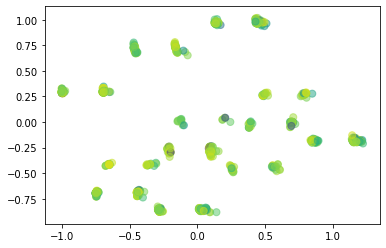

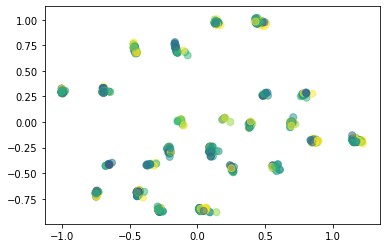

In [493]:
Y2n=Y1n-np.mean(Y1n)
Y2n=Y2n/np.max(Y2n)

x_lda = Xnew1[:,0]
y_lda = Xnew1[:,1]
z_lda = Xnew1[:,2]
plt.scatter(x_lda, y_lda, c=1-Y2n, s=50,  alpha=0.5)
plt.show()
plt.scatter(x_lda, y_lda, c=Ycn ,s=50,  alpha=0.5)